This curriculum is copied from [Melanie Walsh's *Introduction to Cultural Analytics & Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/09-Topic-Modeling-Without-Mallet.html). However, the dataset is different. This script uses the U.S. Inaugural Addresses corpus, which is available for download [here](https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/64e2547e2d86c20cc2a74f660143cfeb/US_Inaugural_Addresses.zip). 

# Topic Modeling — With Tomotopy

In this workshop, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or single text that has been separated into smaller text chunks.

In this particular lesson, we're going to use [Tomotopy](https://github.com/bab2min/tomotopy) to topic model The U.S. Inaugural Addresses [zip file (.zip) of text files (.txt)](https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/64e2547e2d86c20cc2a74f660143cfeb/US_Inaugural_Addresses.zip) contains U.S. Inaugural Addresses ranging from President George Washington (1789) to President Donald Trump (2017). Each text file is titled with a number, the corresponding last name of the U.S. President, and the corresponding year of the Inaugural Address..

Tomotopy is a topic modeling tool that is written purely in Python.

___

## Install Packages

In [18]:
# !pip install tomotopy

In [19]:
# !pip install little_mallet_wrapper

Note: A “wrapper” is a Python package that makes complicated code easier to use and/or makes code from a different programming language accessible in Python.

Since Little MALLET Wrapper also uses the data visualization library seaborn, we’re also going to pip install seaborn:

In [20]:
# !pip install seaborn

## Import Packages

Now let's import `tomotopy`, `little_mallet_wrapper` and the data viz library `seaborn`.

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

Finally, we will also import `pandas` to organize our data

In [21]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Get Training Data From Text Files

Before we topic model the US Innaugural Address files, we need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts if your corpus is a collection of separate text files. 

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
    
<p class="title">Note</p>
    
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
</div>

To get the necessary text files, we're going to make a variable and assign it the file path for the directory that contains the text files.

</br>

*Note: make sure to save your files in the same folder as your Jupyter Notebook!*

In [22]:
directory = "US_Inaugural_Addresses"

Then we're going to use the `glob.gob()` function to make a list of all (`*`) the `.txt` files in that directory.

In [23]:
files = glob.glob(f"{directory}/*.txt")

Next we process our texts with the function `little_mallet_wrapper.process_string()`.

This function will take every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [24]:
training_data = []
original_texts = []
titles = []

for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [25]:
len(training_data), len(original_texts), len(titles)

(58, 58, 58)

## Train Topic Model

In [26]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
    
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -9.218369705171952
Iteration: 10	Log-likelihood: -8.966198451171058
Iteration: 20	Log-likelihood: -8.898082613505371
Iteration: 30	Log-likelihood: -8.852537379808307
Iteration: 40	Log-likelihood: -8.826679196884436
Iteration: 50	Log-likelihood: -8.813672840958201
Iteration: 60	Log-likelihood: -8.81061776741496
Iteration: 70	Log-likelihood: -8.791006078275094
Iteration: 80	Log-likelihood: -8.774812662458613
Iteration: 90	Log-likelihood: -8.77552194070355

Topic Model Results:


✨Topic 0✨

public government constitution states interests citizens rights general state civil

✨Topic 1✨

let america time every americans nation new together words pledge

✨Topic 2✨

congress law policy administration shall right trade respect take make

✨Topic 3✨

never well liberty would cannot equal still national common greater

✨Topic 4✨

country states union would foreign fellow powers duties may free

✨Topic 5✨

life nation justice human day faith na

## Examine Top Documents and Titles

Load topic distributions

In [27]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

Make functions for displaying top documents. The `get_top_docs()` function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

In [28]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

Display top titles

In [29]:
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

public government constitution states interests citizens rights general state civil

---

✨  
**Topic Probability**: 0.18658240139484406  
**Document**: 25_cleveland_1885



✨  
**Topic Probability**: 0.17393745481967926  
**Document**: 14_harrison_1841



✨  
**Topic Probability**: 0.1665860265493393  
**Document**: 15_polk_1845



✨  
**Topic Probability**: 0.16596479713916779  
**Document**: 23_hayes_1877



✨  
**Topic Probability**: 0.15854719281196594  
**Document**: 10_adams_john_quincy_1825



✨  
**Topic Probability**: 0.14904583990573883  
**Document**: 05_jefferson_1805



In [30]:
get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

let america time every americans nation new together words pledge

---

✨  
**Topic Probability**: 0.2781730592250824  
**Document**: 58_trump_2017



✨  
**Topic Probability**: 0.2008107751607895  
**Document**: 56_obama_2009



✨  
**Topic Probability**: 0.19118525087833405  
**Document**: 46_nixon_1969



✨  
**Topic Probability**: 0.1890960931777954  
**Document**: 53_clinton_1997



✨  
**Topic Probability**: 0.18588919937610626  
**Document**: 57_obama_2013



Display top documents with topic words bolded

In [31]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

let america time every americans nation new together words pledge

---

✨  
**Topic Probability**: 0.2781730592250824  
**Document**: Donald Trump 1/20/2017 Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.
We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done. Every 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.Today's ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.For too long, a small group in our Nation's Capital has reaped the rewards of Government while the people have borne the cost. Washington flourished, but the people did not share in its wealth. Politicians prospered, but the jobs left, and the factories closed. The establishment protected itself, but not the citizens of our country. Their victories have not been your victories; their triumphs have not been your triumphs; and while they celebrated in our Nation's Capital, there was little to celebrate for struggling families all across our land. That all changes, starting right here and right now, because this moment is your moment: It belongs to you. It belongs to everyone gathered here today and everyone watching all across America. This is your day. This is your celebration. And this, the United States of America, is your country. What truly matters is not which party controls our Government, but whether our Government is controlled by the people. January 20, 2017, will be remembered as the day the people became the rulers of this Nation again. The forgotten men and women of our country will be forgotten no longer. Everyone is listening to you now. You came by the tens of millions to become part of a historic movement the likes of which the world has never seen before. At the center of this movement is a crucial conviction: that a **nation** exists to serve its citizens. Americans want great schools for their children, safe neighborhoods for their families, and good jobs for themselves. These are just and reasonable demands of righteous people and a righteous public. But for too many of our citizens, a different reality exists: Mothers and children trapped in poverty in our inner cities; rusted-out factories scattered like tombstones across the landscape of our Nation; an education system, flush with cash, but which leaves our young and beautiful students deprived of all knowledge; and the crime and the gangs and the drugs that have stolen too many lives and robbed our country of so much unrealized potential. This American carnage stops right here and stops right now. We are one Nation, and their pain is our pain, their dreams are our dreams, and their success will be our success. We share one heart, one home, and one glorious destiny. The oath of office I take today is an oath of allegiance to all Americans. For many decades, we've enriched foreign industry at the expense of American industry, subsidized the armies of other countries while allowing for the very sad depletion of our military. We've defended other nations' borders while refusing to defend our own and spent trillions and trillions of dollars overseas while America's infrastructure has fallen into disrepair and decay. We've made other countries rich while the wealth, strength, and confidence of our country has dissipated over the horizon. One by one, the factories shuttered and left our shores, with not even a thought about the millions and millions of American workers that were left behind. The wealth of our middle class has been ripped from their homes and then redistributed all across the world. But that is the past. And now we are looking only to the future. We, assembled here today, are issuing a **new** decree to be heard in **every** city, in **every** foreign capital, and in every hall of power. From this day forward, a **new** vision will govern our land. From this this day forward, it's going to be only America first. America first. Every decision on trade, on taxes, on immigration, on foreign affairs, will be made to benefit American workers and American families. We must protect our borders from the ravages of other countries making our products, stealing our companies, and destroying our jobs. Protection will lead to great prosperity and strength. I will fight for you with every breath in my body, and I will never, ever **let** you down. America will start winning again, winning like never before. We will bring back our jobs. We will bring back our borders. We will bring back our wealth. And we will bring back our dreams. We will build new roads and highways and bridges and airports and tunnels and railways all across our wonderful Nation. We will get our people off of welfare and back to work, rebuilding our country with American hands and American labor. We will follow two simple rules: Buy American and hire American. We will seek friendship and good will with the nations of the world, but we do so with the understanding that it is the right of all nations to put their own interests first. We do not seek to impose our way of life on anyone, but rather to **let** it shine as an example—we will shine—for everyone to follow. We will reinforce old alliances and form new ones and unite the civilized world against radical Islamic terrorism, which we will eradicate completely from the face of the Earth. At the bedrock of our politics will be a total allegiance to the United States of America, and through our loyalty to our country, we will rediscover our loyalty to each other. When you open your heart to patriotism, there is no room for prejudice. The Bible tells us, "How good and pleasant it is when God's people live **together** in unity." We must speak our minds openly, debate our disagreements honestly, but always pursue solidarity. When America is united, America is totally unstoppable. There should be no fear: We are protected, and we will always be protected. We will be protected by the great men and women of our military and law enforcement, and most importantly, we will be protected by God. Finally, we must think big and dream even bigger. In America, we understand that a **nation** is only living as long as it is striving. We will no longer accept politicians who are all talk and no action, constantly complaining, but never doing anything about it. The **time** for empty talk is over. Now arrives the hour of action. Do not allow anyone to tell you that it cannot be done. No challenge can match the heart and fight and spirit of America. We will not fail. Our country will thrive and prosper again. We stand at the birth of a new millennium, ready to unlock the mysteries of space, to free the Earth from the miseries of disease, and to harness the energies, industries, and technologies of tomorrow. A new national pride will stir our souls, lift our sights, and heal our divisions. It's **time** to remember that old wisdom our soldiers will never forget: that whether we are Black or Brown or White, we all bleed the same red blood of patriots, we all enjoy the same glorious freedoms, and we all salute the same great American flag. And whether a child is born in the urban sprawl of Detroit or the windswept plains of Nebraska, they look up at the same night sky, they fill their heart with the same dreams, and they are infused with the breath of life by the same almighty Creator. So to all Americans in every city near and far, small and large, from mountain to mountain, from ocean to ocean, hear these **words**: You will never be ignored again. Your voice, your hopes, and your dreams will define our American destiny. And your courage and goodness and love will forever guide us along the way. Together, we will make America strong again. We will make America wealthy again. We will make America proud again. We will make America safe again. And, yes, **together**, we will make America great again. Thank you. God bless you, and God bless America. Thank you. God bless America.



✨  
**Topic Probability**: 0.2008107751607895  
**Document**: Barack Obama	1/20/2009	My fellow citizens, I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our Nation, as well as the generosity and cooperation he has shown throughout this transition.  Forty-four Americans have now taken the Presidential oath. The **words** have been spoken during rising tides of prosperity and the still waters of peace. Yet **every** so often, the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because we the people have remained faithful to the ideals of our forebears and true to our founding documents.  So it has been; so it must be with this generation of Americans.  That we are in the midst of crisis is now well understood. Our Nation is at war against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequence of greed and irresponsibility on the part of some, but also our collective failure to make hard choices and prepare the Nation for a **new** age. Homes have been lost, jobs shed, businesses shuttered. Our health care is too costly. Our schools fail too many. And each day brings further evidence that the ways we use energy strengthen our adversaries and threaten our planet.  These are the indicators of crisis, subject to data and statistics. Less measurable but no less profound is a sapping of confidence across our land, a nagging fear that America's decline is inevitable, that the next generation must lower its sights. Today I say to you that the challenges we face are real. They are serious, and they are many. They will not be met easily or in a short span of **time**. But know this, America: They will be met.  On this day, we gather because we have chosen hope over fear, unity of purpose over conflict and discord. On this day, we come to proclaim an end to the petty grievances and false promises, the recriminations and worn-out dogmas that for far too long have strangled our politics.  We remain a young **nation**, but in the **words** of Scripture, the **time** has come to set aside childish things. The time has come to reaffirm our enduring spirit, to choose our better history, to carry forward that precious gift, that noble idea passed on from generation to generation: the God-given promise that all are equal, all are free, and all deserve a chance to pursue their full measure of happiness.  In reaffirming the greatness of our Nation, we understand that greatness is never a given. It must be earned. Our journey has never been one of shortcuts or settling for less. It has not been the path for the fainthearted, for those who prefer leisure over work or seek only the pleasures of riches and fame. Rather, it has been the risk-takers, the doers, the makers of things--some celebrated, but more often men and women obscure in their labor--who have carried us up the long, rugged path toward prosperity and freedom.  For us, they packed up their few worldly possessions and traveled across oceans in search of a **new** life. For us, they toiled in sweatshops and settled the West, endured the lash of the whip, and plowed the hard Earth. For us, they fought and died in places like Concord and Gettysburg, Normandy and Khe Sanh.  Time and again, these men and women struggled and sacrificed and worked 'til their hands were raw so that we might live a better life. They saw America as bigger than the sum of our individual ambitions, greater than all the differences of birth or wealth or faction.  This is the journey we continue today. We remain the most prosperous, powerful **nation** on Earth. Our workers are no less productive than when this crisis began. Our minds are no less inventive. Our goods and services no less needed than they were last week or last month or last year. Our capacity remains undiminished. But our time of standing pat, of protecting narrow interests and putting off unpleasant decisions, that time has surely passed. Starting today, we must pick ourselves up, dust ourselves off, and begin again the work of remaking America.  For everywhere we look, there is work to be done. The state of the economy calls for action, bold and swift, and we will act not only to create new jobs but to lay a new foundation for growth. We will build the roads and bridges, the electric grids and digital lines that feed our commerce and bind us **together**. We will restore science to its rightful place and wield technology's wonders to raise health care's quality and lower its cost. We will harness the sun and the winds and the soil to fuel our cars and run our factories. And we will transform our schools and colleges and universities to meet the demands of a new age. All this we can do. All this we will do.  Now, there are some who question the scale of our ambitions, who suggest that our system cannot tolerate too many big plans. Their memories are short, for they have forgotten what this country has already done, what free men and women can achieve when imagination is joined to common purpose and necessity to courage.  What the cynics fail to understand is that the ground has shifted beneath them, that the stale political arguments that have consumed us for so long no longer apply. The question we ask today is not whether our Government is too big or too small, but whether it works; whether it helps families find jobs at a decent wage, care they can afford, a retirement that is dignified. Where the answer is yes, we intend to move forward. Where the answer is no, programs will end. And those of us who manage the public's dollars will be held to account to spend wisely, reform bad habits, and do our business in the light of day, because only then can we restore the vital trust between a people and their government.  Nor is the question before us whether the market is a force for good or ill. Its power to generate wealth and expand freedom is unmatched. But this crisis has reminded us that without a watchful eye, the market can spin out of control. The Nation cannot prosper long when it favors only the prosperous. The success of our economy has always depended not just on the size of our gross domestic product, but on the reach of our prosperity, on our ability to extend opportunity to **every** willing heart, not out of charity, but because it is the surest route to our common good.  As for our common defense, we reject as false the choice between our safety and our ideals. Our Founding Fathers, faced with perils that we can scarcely imagine, drafted a charter to assure the rule of law and the rights of man, a charter expanded by the blood of generations. Those ideals still light the world, and we will not give them up for expedience's sake. And so to all the other peoples and governments who are watching today, from the grandest capitals to the small village where my father was born, know that America is a friend of each nation and every man, woman, and child who seeks a future of peace and dignity, and we are ready to lead once more.  Recall that earlier generations faced down fascism and communism not just with missiles and tanks but with sturdy alliances and enduring convictions. They understood that our power alone cannot protect us, nor does it entitle us to do as we please. Instead, they knew that our power grows through its prudent use. Our security emanates from the justness of our cause, the force of our example, the tempering qualities of humility and restraint.  We are the keepers of this legacy. Guided by these principles once more, we can meet those new threats that demand even greater effort, even greater cooperation and understanding between nations. We will begin to responsibly leave Iraq to its people and forge a hard-earned peace in Afghanistan. With old friends and former foes, we will work tirelessly to lessen the nuclear threat and roll back the specter of a warming planet. We will not apologize for our way of life, nor will we waver in its defense. And for those who seek to advance their aims by inducing terror and slaughtering innocents, we say to you now that our spirit is stronger and cannot be broken. You cannot outlast us, and we will defeat you.  For we know that our patchwork heritage is a strength, not a weakness. We are a nation of Christians and Muslims, Jews and Hindus and nonbelievers. We are shaped by every language and culture, drawn from every end of this Earth. And because we have tasted the bitter swill of civil war and segregation and emerged from that dark chapter stronger and more united, we cannot help but believe that the old hatreds shall someday pass, that the lines of tribe shall soon dissolve; that as the world grows smaller, our common humanity shall reveal itself, and that America must play its role in ushering in a new era of peace.  To the Muslim world, we seek a new way forward based on mutual interest and mutual respect. To those leaders around the globe who seek to sow conflict or blame their society's ills on the West, know that your people will judge you on what you can build, not what you destroy. To those who cling to power through corruption and deceit and the silencing of dissent, know that you are on the wrong side of history, but that we will extend a hand if you are willing to unclench your fist.  To the people of poor nations, we **pledge** to work alongside you to make your farms flourish and **let** clean waters flow, to nourish starved bodies and feed hungry minds. And to those nations like ours that enjoy relative plenty, we say we can no longer afford indifference to suffering outside our borders, nor can we consume the world's resources without regard to effect, for the world has changed, and we must change with it.  As we consider the road that unfolds before us, we remember with humble gratitude those brave Americans who, at this very hour, patrol far-off deserts and distant mountains. They have something to tell us today, just as the fallen heroes who lie in Arlington whisper through the ages. We honor them not only because they are guardians of our liberty, but because they embody the spirit of service, a willingness to find meaning in something greater than themselves. And yet at this moment, a moment that will define a generation, it is precisely this spirit that must inhabit us all.  For as much as Government can do and must do, it is ultimately the faith and determination of the American people upon which this Nation relies. It is the kindness to take in a stranger when the levees break, the selflessness of workers who would rather cut their hours than see a friend lose their job, which sees us through our darkest hours. It is the firefighter's courage to storm a stairway filled with smoke, but also a parent's willingness to nurture a child, that finally decides our fate.  Our challenges may be new. The instruments with which we meet them may be new. But those values upon which our success depends--honesty and hard work, courage and fair play, tolerance and curiosity, loyalty and patriotism--these things are old. These things are true. They have been the quiet force of progress throughout our history. What is demanded then is a return to these truths. What is required of us now is a new era of responsibility, a recognition on the part of every American that we have duties to ourselves, our Nation, and the world. Duties that we do not grudgingly accept but, rather, seize gladly, firm in the knowledge that there is nothing so satisfying to the spirit, so defining of our character, than giving our all to a difficult task.  This is the price and the promise of citizenship. This is the source of our confidence, the knowledge that God calls on us to shape an uncertain destiny. This is the meaning of our liberty and our creed; why men and women and children of every race and every faith can join in celebration across this magnificent Mall, and why a man whose father less than 60 years ago might not have been served at a local restaurant can now stand before you to take a most sacred oath.  So **let** us mark this day with remembrance of who we are and how far we have traveled. In the year of America's birth, in the coldest of months, a small band of patriots huddled by dying campfires on the shores of an icy river. The Capital was abandoned. The enemy was advancing. The snow was stained with blood. At a moment when the outcome of our Revolution was most in doubt, the Father of our Nation ordered these words be read to the people: "Let it be told to the future world . . . that in the depth of winter, when nothing but hope and virtue could survive . . . that the city and the country, alarmed at one common danger, came forth to meet [it]."  America, in the face of our common dangers, in this winter of our hardship, let us remember these timeless words. With hope and virtue, let us brave once more the icy currents and endure what storms may come. Let it be said by our children's children that when we were tested, we refused to let this journey end; that we did not turn back, nor did we falter. And with eyes fixed on the horizon and God's grace upon us, we carried forth that great gift of freedom and delivered it safely to future generations.  Thank you. God bless you, and God bless the United States of America.



✨  
**Topic Probability**: 0.19118525087833405  
**Document**: Richard Nixon	1/20/1969	Senator Dirksen, Mr. Chief Justice, Mr. Vice president, President Johnson, Vice president Humphrey, my fellow Americans-and my fellow citizens of the world community: I ask you to share with me today the majesty of this moment. In the orderly transfer of power, we celebrate the unity that keeps us free.  Each moment in history is a fleeting **time**, precious and unique. But some stand out as moments of beginning, in which courses are set that shape decades or centuries.<br>This can be such a moment.  Forces now are converging that make possible, for the first **time**, the hope that many of man's deepest aspirations can at last be realized. The spiraling pace of change allows us to contemplate, within our own lifetime, advances that once would have taken centuries.  In throwing wide the horizons of space, we have discovered **new** horizons on earth.  For the first time, because the people of the world want peace, and the leaders of the world are afraid of war, the times are on the side of peace.  Eight years from now America will celebrate its 200th anniversary as a **nation**. Within the lifetime of most people now living, mankind will celebrate that great **new** year which comes only once in a thousand years--the beginning of the third millennium.  What kind of a **nation** we will be, what kind of a world we will live in, whether we shape the future in the image of our hopes, is ours to determine by our actions and our choices.  The greatest honor history can bestow is the title of peacemaker. This honor now beckons America--the chance to help lead the world at last out of the valley of turmoil and onto that high ground of peace that man has dreamed of since the dawn of civilization.  If we succeed, generations to come will say of us now living that we mastered our moment, that we helped make the world safe for mankind.  This is our summons to greatness.  I believe the American people are ready to answer this call.  The second third of this century has been a time of proud achievement. We have made enormous strides in science and industry and agriculture. We have shared our wealth more broadly than ever. We have learned at last to manage a modern economy to assure its continued growth.  We have given freedom new reach. We have begun to make its promise real for black as well as for white.  We see the hope of tomorrow in the youth of today. I know America's youth. I believe in them. We can be proud that they are better educated, more committed, more passionately driven by conscience than any generation in our history.  No people has ever been so close to the achievement of a just and abundant society, or so possessed of the will to achieve it. And because our strengths are so great, we can afford to appraise our weaknesses with candor and to approach them with hope.  Standing in this same place a third of a century ago, Franklin Delano Roosevelt addressed a nation ravaged by depression and gripped in fear. He could say in surveying the Nation's troubles: "They concern, thank God, only material things." Our crisis today is in reverse.  We find ourselves rich in goods, but ragged in spirit; reaching with magnificent precision for the moon, but failing into raucous discord on earth.  We are caught in war, wanting peace. We are torn by division, wanting unity. We see around us empty lives, wanting fulfillment. We see tasks that need doing, waiting for hands to do them.  To a crisis of the spirit, we need an answer of the spirit.  And to find that answer, we need only look within ourselves.  When we listen to "the better angels of our nature," we find that they celebrate the simple things, the basic things--such as goodness, decency, love, kindness.  Greatness comes in simple trappings. The simple things are the ones most needed today if we are to surmount what divides us, and cement what unites us.  To lower our voices would be a simple thing.  In these difficult years, America has suffered from a fever of **words**; from inflated rhetoric that promises more than it can deliver; from angry rhetoric that fans discontents into hatreds; from bombastic rhetoric that postures instead of persuading.  We cannot learn from one another until we stop shouting at one another--until we speak quietly enough so that our **words** can be heard as well as our voices.  For its part, government will listen. We will strive to listen in new ways--to the voices of quiet anguish, the voices that speak without words, the voices of the heart--to the injured voices, the anxious voices, the voices that have despaired of being heard.  Those who have been left out, we will try to bring in.  Those left behind, we will help to catch up.  For all of our people, we will set as our goal the decent order that makes progress possible and our lives secure.  As we reach toward our hopes, our task is to build on what has gone before--not turning away from the old, but turning toward the new.  In this past third of a century, government has passed more laws, spent more money, initiated more programs than in all our previous history.  In pursuing our goals of full employment, better housing, excellence in education; in rebuilding our cities and improving our rural areas; in protecting our environment and enhancing the quality of life--in all these and more, we will and must press urgently forward.  We shall plan now for the day when our wealth can be transferred from the destruction of war abroad to the urgent needs of our people at home.  The American dream does not come to those who fall asleep.  But we are approaching the limits of what government alone can do.  Our greatest need now is to reach beyond government, to enlist the legions of the concerned and the committed.  What has to be done, has to be done by government and people **together** or it will not be done at all. The lesson of past agony is that without the people we can do nothing--with the people we can do everything.  To match the magnitude of our tasks, we need the energies of our people--enlisted not only in grand enterprises, but more importantly in those small, splendid efforts that make headlines in the neighborhood newspaper instead of the national journal.  With these, we can build a great cathedral of the spirit--each of us raising it one stone at a time, as he reaches out to his neighbor, helping, caring, doing.  I do not offer a life of uninspiring ease. I do not call for a life of grim sacrifice. I ask you to join in a high adventure--one as rich as humanity itself, and exciting as the times we live in.  The essence of freedom is that each of us shares in the shaping of his own destiny.  Until he has been part of a cause larger than himself, no man is truly whole.  The way to fulfillment is in the use of our talents. We achieve nobility in the spirit that inspires that use.  As we measure what can be done, we shall promise only what we know we can produce; but as we chart our goals, we shall be lifted by our dreams.  No man can be fully free while his neighbor is not. To go forward at all is to go forward **together**.  This means black and white together, as one nation, not two. The laws have caught up with our conscience. What remains is to give life to what is in the law: to insure at last that as all are born equal in dignity before God, all are born equal in dignity before man.  As we learn to go forward together at home, **let** us also seek to go forward together with all mankind.  Let us take as our goal: Where peace is unknown, make it welcome; where Peace is fragile, make it strong; where peace is temporary, make it permanent.  After a period of confrontation, we are entering an era of negotiation.  Let all nations know that during this administration our lines of communication will be open.  We seek an open world--open to ideas, open to the exchange of goods and people--a world in which no people, great or small, will live in angry isolation.  We cannot expect to make everyone our friend, but we can try to make no one our enemy.  Those who would be our adversaries, we invite to a peaceful competition--not in conquering territory or extending dominion, but in enriching the life of man.  As we explore the reaches of space, **let** us go to the new worlds together--not as new worlds to be conquered, but as a new adventure to be shared.  With those who are willing to join, let us cooperate to reduce the burden of arms, to strengthen the structure of peace, to lift up the poor and the hungry.  But to all those who would be tempted by weakness, let us leave no doubt that we will be as strong as we need to be for as long as we need to be.  Over the past 20 years, since I first came to this Capital as a freshman Congressman, I have visited most of the nations of the world. I have come to know the leaders of the world and the great forces, the hatreds, the fears that divide the world.  I know that peace does not come through wishing for it--that there is no substitute for days and even years of patient and prolonged diplomacy.<br>I also know the people of the world.  I have seen the hunger of a homeless child, the pain of a man wounded in battle, the grief of a mother who has lost her son. I know these have no ideology, no race.  I know America. I know the heart of America is good.  I speak from my own heart, and the heart of my country, the deep concern we have for those who suffer and those who sorrow.  I have taken an oath today in the presence of God and my countrymen to uphold and defend the Constitution of the United States. To that oath I now add this sacred commitment: I shall consecrate my Office, my energies, and all the wisdom I can summon to the cause of peace among nations.  Let this message be heard by strong and weak alike: The peace we seek--the peace we seek to win--is not victory over any other people, but the peace that comes "with healing in its wings"; with compassion for those who have suffered; with understanding for those who have opposed us; with the opportunity for all the peoples of this earth to choose their own destiny.  Only a few short weeks ago we shared the glory of man's first sight of the world as God sees it, as a single sphere reflecting light in the darkness.  As the Apollo astronauts flew over the moon's gray surface on Christmas Eve, they spoke to us of the beauty of earth-and in that voice so clear across the lunar distance, we heard them invoke God's blessing on its goodness.  In that moment, their view from the moon moved poet Archibald MacLeish to write: "To see the earth as it truly is, small and blue and beautiful in that eternal silence where it floats, is to see ourselves as riders on the earth together, brothers on that bright loveliness in the eternal cold--brothers who know now they are truly brothers."  In that moment of surpassing technological triumph, men turned their thoughts toward home and humanity-seeing in that far perspective that man's destiny on earth is not divisible; telling us that however far we reach into the cosmos, our destiny lies not in the stars but on earth itself, in our own hands, in our own hearts.  We have endured a long night of the American spirit. But as our eyes catch the dimness of the first rays of dawn, let us not curse the remaining dark. Let us gather the light.  Our destiny offers not the cup of despair, but the chalice of opportunity. So let us seize it not in fear, but in gladness-and "riders on the earth together," let us go forward, firm in our faith, steadfast in our purpose, cautious of the dangers, but sustained by our confidence in the will of God and the promise of man.



✨  
**Topic Probability**: 0.1890960931777954  
**Document**: Bill Clinton	1/20/1997	My fellow citizens, at this last Presidential Inauguration of the 20th century, **let** us lift our eyes toward the challenges that await us in the next century. It is our great good fortune that **time** and chance have put us not only at the edge of a **new** century, in a **new** millennium, but on the edge of a bright new prospect in human affairs, a moment that will define our course and our character for decades to comes. We must keep our old democracy forever young. Guided by the ancient vision of a promised land, **let** us set our sights upon a land of new promise. The promise of America was born in the 18th century out of the bold conviction that we are all created equal. It was extended and preserved in the 19th century, when our Nation spread across the continent, saved the Union, and abolished the awful scourge of slavery. Then, in turmoil and triumph, that promise exploded onto the world stage to make this the American Century. And what a century it has been. America became the world's mightiest industrial power, saved the world from tyranny in two World Wars and a long cold war, and **time** and again reached out across the globe to millions who, like us, longed for the blessings of liberty. Along the way, Americans produced a great middle class and security in old age, built unrivaled centers of learning and opened public schools to all, split the atom and explored the heavens, invented the computer and the microchip, and deepened the wellspring of justice by making a revolution in civil rights for African-Americans and all minorities and extending the circle of citizenship, opportunity, and dignity to women. Now, for the third time, a new century is upon us and another time to choose. We began the 19th century with a choice: to spread our Nation from coast to coast. We began the 20th century with a choice: to harness the industrial revolution to our values of free enterprise, conservation, and human decency. Those choices made all the difference. At the dawn of the 21st century, a free people must now choose to shape the forces of the information age and the global society, to unleash the limitless potential of all our people, and yes, to form a more perfect Union. When last we gathered, our march to this new future seemed less certain than it does today. We vowed then to set a clear course to renew our Nation. In these 4 years, we have been touched by tragedy, exhilarated by challenge, strengthened by achievement. America stands alone as the world's indispensable **nation**. Once again, our economy is the strongest on Earth. Once again, we are building stronger families, thriving communities, better educational opportunities, a cleaner environment. Problems that once seemed destined to deepen, now bend to our efforts. Our streets are safer, and record numbers of our fellow citizens have moved from welfare to work. And once again, we have resolved for our time a great debate over the role of Government. Today we can declare: Government is not the problem, and Government is not the solution. We--; the American people--; we are the solution. Our Founders understood that well and gave us a democracy strong enough to endure for centuries, flexible enough to face our common challenges and advance our common dreams in each new day. As times change, so Government must change. We need a new Government for a new century, humble enough not to try to solve all our problems for us but strong enough to give us the tools to solve our problems for ourselves, a Government that is smaller, lives within its means, and does more with less. Yet where it can stand up for our values and interests around the world, and where it can give Americans the power to make a real difference in their everyday lives, Government should do more, not less. The preeminent mission of our new Government is to give all Americans an opportunity, not a guarantee but a real opportunity, to build better lives. Beyond that, my fellow citizens, the future is up to us. Our Founders taught us that the preservation of our liberty and our Union depends upon responsible citizenship. And we need a new sense of responsibility for a new century. There is work to do, work that Government alone cannot do: teaching children to read, hiring people off welfare rolls, coming out from behind locked doors and shuttered windows to help reclaim our streets from drugs and gangs and crime, taking time out of our own lives to serve others. Each and **every** one of us, in our own way, must assume personal responsibility not only for ourselves and our families but for our neighbors and our Nation. Our greatest responsibility is to embrace a new spirit of community for a new century. For any one of us to succeed, we must succeed as one America. The challenge of our past remains the challenge of our future: Will we be one Nation, one people, with one common destiny, or not? Will we all come **together**, or come apart? The divide of race has been America's constant curse. And each new wave of immigrants gives new targets to old prejudices. Prejudice and contempt cloaked in the pretense of religious or political conviction are no different. These forces have nearly destroyed our Nation in the past. They plague us still. They fuel the fanaticism of terror. And they torment the lives of millions in fractured nations all around the world. These obsessions cripple both those who hate and of course those who are hated, robbing both of what they might become. We cannot, we will not, succumb to the dark impulses that lurk in the far regions of the soul everywhere. We shall overcome them. And we shall replace them with the generous spirit of a people who feel at home with one another. Our rich texture of racial, religious, and political diversity will be a godsend in the 21st century. Great rewards will come to those who can live **together**, learn together, work together, forge new ties that bind together. As this new era approaches, we can already see its broad outlines. Ten years ago, the Internet was the mystical province of physicists; today, it is a commonplace encyclopedia for millions of schoolchildren. Scientists now are decoding the blueprint of human life. Cures for our most feared illnesses seem close at hand. The world is no longer divided into two hostile camps. Instead, now we are building bonds with nations that once were our adversaries. Growing connections of commerce and culture give us a chance to lift the fortunes and spirits of people the world over. And for the very first time in all of history, more people on this planet live under democracy than dictatorship. My fellow Americans, as we look back at this remarkable century, we may ask, can we hope not just to follow but even to surpass the achievements of the 20th century in America and to avoid the awful bloodshed that stained its legacy? To that question, **every** American here and every American in our land today must answer a resounding, Yes!" This is the heart of our task. With a new vision of Government, a new sense of responsibility, a new spirit of community, we will sustain America's journey. The promise we sought in a new land, we will find again in a land of new promise. In this new land, education will be every citizen's most prized possession. Our schools will have the highest standards in the world, igniting the spark of possibility in the eyes of every girl and every boy. And the doors of higher education will be open to all. The knowledge and power of the information age will be within reach not just of the few but of every classroom, every library, every child. Parents and children will have time not only to work but to read and play together. And the plans they make at their kitchen table will be those of a better home, a better job, the certain chance to go to college. Our streets will echo again with the laughter of our children, because no one will try to shoot them or sell them drugs anymore. Everyone who can work, will work, with today's permanent under class part of tomorrow's growing middle class. New miracles of medicine at last will reach not only those who can claim care now but the children and hard-working families too long denied. We will stand mighty for peace and freedom and maintain a strong defense against terror and destruction. Our children will sleep free from the threat of nuclear, chemical, or biological weapons. Ports and airports, farms and factories will thrive with trade and innovation and ideas. And the world's greatest democracy will lead a whole world of democracies. Our land of new promise will be a **nation** that meets its obligations, a nation that balances its budget but never loses the balance of its values, a nation where our grandparents have secure retirement and health care and their grandchildren know we have made the reforms necessary to sustain those benefits for their time, a nation that fortifies the world's most productive economy even as it protects the great natural bounty of our water, air, and majestic land. And in this land of new promise, we will have reformed our politics so that the voice of the people will always speak louder than the din of narrow interests, regaining the participation and deserving the trust of all Americans. Fellow citizens, let us build that America, a nation ever moving forward toward realizing the full potential of all its citizens. Prosperity and power, yes, they are important, and we must maintain them. But let us never forget, the greatest progress we have made and the greatest progress we have yet to make is in the human heart. In the end, all the world's wealth and a thousand armies are no match for the strength and decency of the human spirit. Thirty-four years ago, the man whose life we celebrate today spoke to us down there, at the other end of this Mall, in **words** that moved the conscience of a nation. Like a prophet of old, he told of his dream that one day America would rise up and treat all its citizens as equals before the law and in the heart. Martin Luther King's dream was the American dream. His quest is our quest: the ceaseless striving to live out our true creed. Our history has been built on such dreams and labors. And by our dreams and labors, we will redeem the promise of America in the 21st century. To that effort I **pledge** all my strength and every power of my office. I ask the Members of Congress here to join in that **pledge**. The American people returned to office a President of one party and a Congress of another. Surely they did not do this to advance the politics of petty bickering and extreme partisanship they plainly deplore. No, they call on us instead to be repairers of the breach and to move on with America's mission. America demands and deserves big things from us, and nothing big ever came from being small. Let us remember the timeless wisdom of Cardinal Bernardin, when facing the end of his own life. He said, "It is wrong to waste the precious gift of time on acrimony and division." Fellow citizens, we must not waste the precious gift of this time. For all of us are on that same journey of our lives, and our journey, too, will come to an end. But the journey of our America must go on. And so, my fellow Americans, we must be strong, for there is much to dare. The demands of our time are great, and they are different. Let us meet them with faith and courage, with patience and a grateful, happy heart. Let us shape the hope of this day into the noblest chapter in our history. Yes, let us build our bridge, a bridge wide enough and strong enough for every American to cross over to a blessed land of new promise. May those generations whose faces we cannot yet see, whose names we may never know, say of us here that we led our beloved land into a new century with the American dream alive for all her children, with the American promise of a more perfect Union a reality for all her people, with America's bright flame of freedom spreading throughout all the world. From the height of this place and the summit of this century, let us go forth. May God strengthen our hands for the good work ahead, and always, always bless our America."



✨  
**Topic Probability**: 0.18588919937610626  
**Document**: Barack Obama	1/21/2013	Thank you. Thank you so much. Vice President Biden, Mr. Chief Justice, Members of the United States Congress, distinguished guests, and fellow citizens: Each **time** we gather to inaugurate a President we bear witness to the enduring strength of our Constitution. We affirm the promise of our democracy. We recall that what binds this Nation **together** is not the colors of our skin or the tenets of our faith or the origins of our names. What makes us exceptional--; what makes us American--; is our allegiance to an idea articulated in a declaration made more than two centuries ago: We hold these truths to be self-evident, that all men are created equal; that they are endowed by their Creator with certain unalienable rights; that among these are life, liberty, and the pursuit of happiness. Today we continue a never-ending journey to bridge the meaning of those **words** with the realities of our **time**. For history tells us that while these truths may be self-evident, they've never been self-executing; that while freedom is a gift from God, it must be secured by His people here on Earth. The patriots of 1776 did not fight to replace the tyranny of a king with the privileges of a few or the rule of a mob. They gave to us a republic, a government of and by and for the people, entrusting each generation to keep safe our founding creed. And for more than 200 years, we have. Through blood drawn by lash and blood drawn by sword, we learned that no union founded on the principles of liberty and equality could survive half-slave and half-free. We made ourselves anew, and vowed to move forward **together**. Together, we determined that a modern economy requires railroads and highways to speed travel and commerce, schools and colleges to train our workers. Together, we discovered that a free market only thrives when there are rules to ensure competition and fair play. Together, we resolved that a great **nation** must care for the vulnerable and protect its people from life's worst hazards and misfortune. Through it all, we have never relinquished our skepticism of central authority nor have we succumbed to the fiction that all society's ills can be cured through government alone. Our celebration of initiative and enterprise, our insistence on hard work and personal responsibility, these are constants in our character. But we have always understood that when times change, so must we; that fidelity to our founding principles requires **new** responses to **new** challenges; that preserving our individual freedoms ultimately requires collective action. For the American people can no more meet the demands of today's world by acting alone than American soldiers could have met the forces of fascism or communism with muskets and militias. No single person can train all the math and science teachers we'll need to equip our children for the future, or build the roads and networks and research labs that will bring new jobs and businesses to our shores. Now more than ever, we must do these things together, as one **nation** and one people. This generation of Americans has been tested by crises that steeled our resolve and proved our resilience. A decade of war is now ending. An economic recovery has begun. America's possibilities are limitless, for we possess all the qualities that this world without boundaries demands: youth and drive; diversity and openness; an endless capacity for risk and a gift for reinvention. My fellow Americans, we are made for this moment and we will seize it--; so long as we seize it together. For we, the people, understand that our country cannot succeed when a shrinking few do very well and a growing many barely make it. We believe that America's prosperity must rest upon the broad shoulders of a rising middle class. We know that America thrives when **every** person can find independence and pride in their work; when the wages of honest labor liberate families from the brink of hardship. We are true to our creed when a little girl born into the bleakest poverty knows that she has the same chance to succeed as anybody else, because she is an American; she is free and she is equal, not just in the eyes of God, but also in our own. We understand that outworn programs are inadequate to the needs of our time. So we must harness new ideas and technology to remake our government, revamp our Tax Code, reform our schools, and empower our citizens with the skills they need to work harder, learn more, reach higher. But while the means will change, our purpose endures: a nation that rewards the effort and determination of **every** single American. That is what this moment requires. That is what will give real meaning to our creed. We, the people, still believe that every citizen deserves a basic measure of security and dignity. We must make the hard choices to reduce the cost of health care and the size of our deficit. But we reject the belief that America must choose between caring for the generation that built this country and investing in the generation that will build its future. For we remember the lessons of our past, when twilight years were spent in poverty and parents of a child with a disability had nowhere to turn. We do not believe that in this country freedom is reserved for the lucky, or happiness for the few. We recognize that no matter how responsibly we live our lives, any one of us at any time may face a job loss or a sudden illness or a home swept away in a terrible storm. The commitments we make to each other through Medicare and Medicaid and Social Security, these things do not sap our initiative, they strengthen us. They do not make us a nation of takers; they free us to take the risks that make this country great. We, the people, still believe that our obligations as Americans are not just to ourselves, but to all posterity. We will respond to the threat of climate change, knowing that the failure to do so would betray our children and future generations. Some may still deny the overwhelming judgment of science, but none can avoid the devastating impact of raging fires and crippling drought and more powerful storms. The path towards sustainable energy sources will be long and sometimes difficult. But America cannot resist this transition, we must lead it. We cannot cede to other nations the technology that will power new jobs and new industries, we must claim its promise. That's how we will maintain our economic vitality and our national treasure--; our forests and waterways, our crop lands and snow-capped peaks. That is how we will preserve our planet, commanded to our care by God. That's what will lend meaning to the creed our fathers once declared. We, the people, still believe that enduring security and lasting peace do not require perpetual war. Our brave men and women in uniform, tempered by the flames of battle, are unmatched in skill and courage. Our citizens, seared by the memory of those we have lost, know too well the price that is paid for liberty. The knowledge of their sacrifice will keep us forever vigilant against those who would do us harm. But we are also heirs to those who won the peace and not just the war; who turned sworn enemies into the surest of friends--; and we must carry those lessons into this time as well. We will defend our people and uphold our values through strength of arms and rule of law. We will show the courage to try and resolve our differences with other nations peacefully--; not because we are naive about the dangers we face, but because engagement can more durably lift suspicion and fear. America will remain the anchor of strong alliances in every corner of the globe. And we will renew those institutions that extend our capacity to manage crisis abroad, for no one has a greater stake in a peaceful world than its most powerful nation. We will support democracy from Asia to Africa, from the Americas to the Middle East, because our interests and our conscience compel us to act on behalf of those who long for freedom. And we must be a source of hope to the poor, the sick, the marginalized, the victims of prejudice--; not out of mere charity, but because peace in our time requires the constant advance of those principles that our common creed describes: tolerance and opportunity, human dignity and justice. We, the people, declare today that the most evident of truths--; that all of us are created equal--; is the star that guides us still; just as it guided our forebears through Seneca Falls and Selma and Stonewall; just as it guided all those men and women, sung and unsung, who left footprints along this great Mall, to hear a preacher say that we cannot walk alone; to hear a King proclaim that our individual freedom is inextricably bound to the freedom of every soul on Earth. It is now our generation's task to carry on what those pioneers began. For our journey is not complete until our wives, our mothers and daughters can earn a living equal to their efforts. Our journey is not complete until our gay brothers and sisters are treated like anyone else under the law--; for if we are truly created equal, then surely the love we commit to one another must be equal as well. Our journey is not complete until no citizen is forced to wait for hours to exercise the right to vote. Our journey is not complete until we find a better way to welcome the striving, hopeful immigrants who still see America as a land of opportunity--; until bright young students and engineers are enlisted in our workforce rather than expelled from our country. Our journey is not complete until all our children, from the streets of Detroit to the hills of Appalachia, to the quiet lanes of Newtown, know that they are cared for and cherished and always safe from harm. That is our generation's task--; to make these **words**, these rights, these values of life and liberty and the pursuit of happiness real for every American. Being true to our founding documents does not require us to agree on every contour of life. It does not mean we all define liberty in exactly the same way or follow the same precise path to happiness. Progress does not compel us to settle centuries-long debates about the role of government for all time, but it does require us to act in our time. For now decisions are upon us and we cannot afford delay. We cannot mistake absolutism for principle or substitute spectacle for politics or treat name-calling as reasoned debate. We must act, knowing that our work will be imperfect. We must act, we must act knowing that today's victories will be only partial and that it will be up to those who stand here in 4 years and 40 years and 400 years hence to advance the timeless spirit once conferred to us in a spare Philadelphia hall. My fellow Americans, the oath I have sworn before you today, like the one recited by others who serve in this Capitol, was an oath to God and country, not party or faction. And we must faithfully execute that **pledge** during the duration of our service. But the words I spoke today are not so different from the oath that is taken each time a soldier signs up for duty or an immigrant realizes her dream. My oath is not so different from the **pledge** we all make to the flag that waves above and that fills our hearts with pride. They are the words of citizens and they represent our greatest hope. You and I, as citizens, have the power to set this country's course. You and I, as citizens, have the obligation to shape the debates of our time--; not only with the votes we cast, but with the voices we lift in defense of our most ancient values and enduring ideals. Let us, each of us, now embrace with solemn duty and awesome joy what is our lasting birthright. With common effort and common purpose, with passion and dedication, **let** us answer the call of history and carry into an uncertain future that precious light of freedom. Thank you. God bless you, and may He forever bless these United States of America.



## Heatmap

Make a heatmap. This function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L171)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels, 
                                      topic_distributions, 
                                      topic_keys, 
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):
    
    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
        
    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [33]:
target_labels = titles

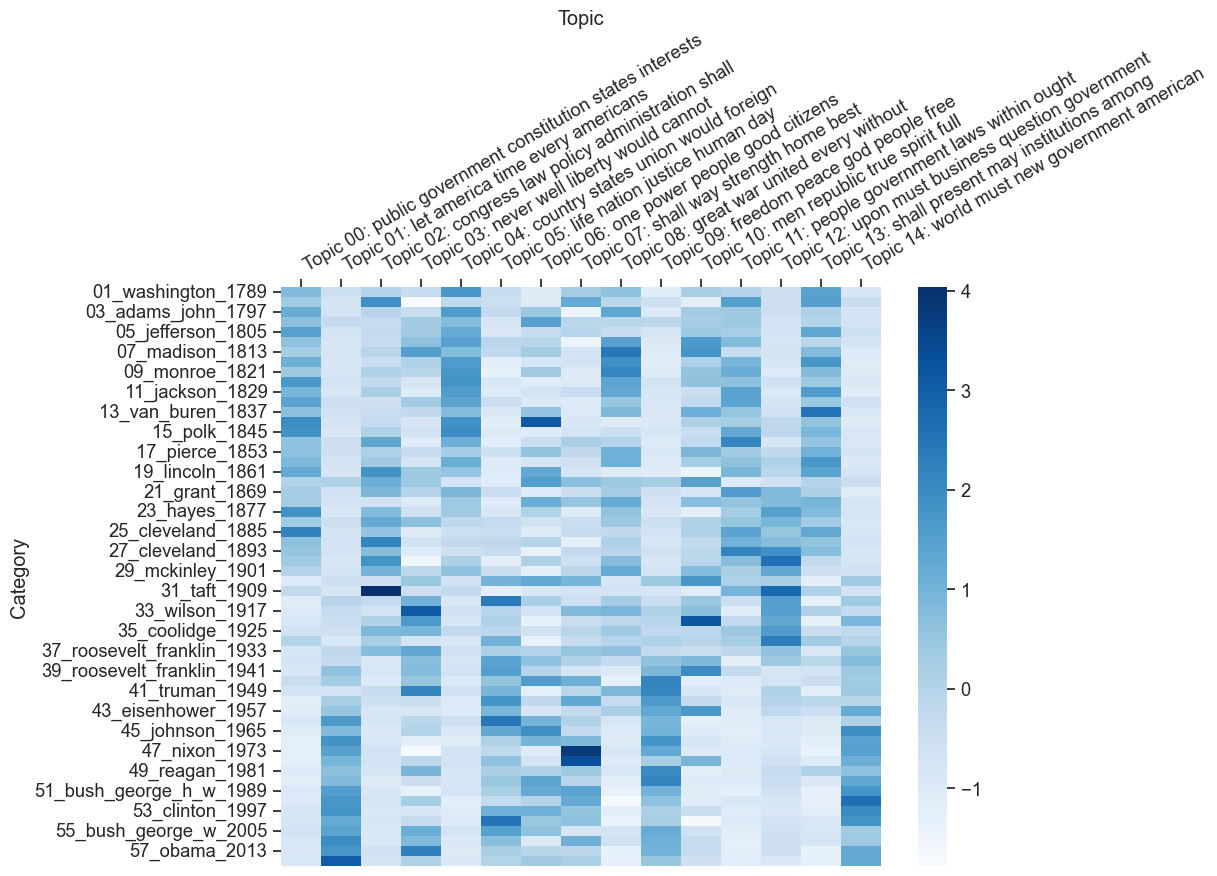

In [34]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

## Output a CSV File

In [35]:
topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [36]:
df

,document,Topic 0 public government constitution states,Topic 1 let america time every,Topic 2 congress law policy administration,Topic 3 never well liberty would,Topic 4 country states union would,Topic 5 life nation justice human,Topic 6 one power people good,Topic 7 shall way strength home,Topic 8 great war united every,Topic 9 freedom peace god people,Topic 10 men republic true spirit,Topic 11 people government laws within,Topic 12 upon must business question,Topic 13 shall present may institutions,Topic 14 world must new government
0,13_van_buren_1837,0.103759,0.019478,0.027879,0.064597,0.129080,0.021807,0.090938,0.028187,0.123126,0.016508,0.073712,0.094818,0.018981,0.163650,0.023479
1,47_nixon_1973,0.002863,0.165237,0.016686,0.024834,0.035152,0.054054,0.045172,0.188490,0.057339,0.159712,0.019301,0.018296,0.013205,0.003987,0.195671
2,50_reagan_1985,0.007285,0.121603,0.000807,0.057991,0.024453,0.082450,0.113827,0.059329,0.045878,0.220978,0.018770,0.015793,0.027186,0.021180,0.182469
3,53_clinton_1997,0.024792,0.189096,0.006370,0.048753,0.009572,0.107176,0.104938,0.080164,0.043647,0.086298,0.033687,0.011214,0.009147,0.012985,0.232162
4,17_pierce_1853,0.102543,0.025765,0.052111,0.060179,0.097632,0.039214,0.091001,0.053733,0.129430,0.018454,0.068552,0.087475,0.038977,0.101254,0.033679
5,14_harrison_1841,0.173937,0.009687,0.033209,0.048071,0.200907,0.014244,0.162594,0.031270,0.049732,0.012654,0.047638,0.082706,0.040024,0.083218,0.010108
6,56_obama_2009,0.024374,0.200811,0.005184,0.092573,0.016801,0.092221,0.048059,0.097486,0.066281,0.147060,0.035384,0.005489,0.024978,0.026901,0.116399
7,25_cleveland_1885,0.186582,0.012154,0.071344,0.042172,0.042997,0.041676,0.045937,0.047883,0.081268,0.025869,0.047420,0.140650,0.071430,0.111599,0.031019
8,03_adams_john_1797,0.131741,0.012914,0.045052,0.059619,0.184263,0.050057,0.087285,0.013437,0.140786,0.011399,0.053504,0.088554,0.024907,0.063713,0.032768
9,12_jackson_1833,0.142679,0.026719,0.021368,0.079671,0.171378,0.041681,0.047937,0.025954,0.108691,0.018468,0.039468,0.140884,0.016170,0.078705,0.040226


In [38]:
df.sort_values(by='Topic 3 never well liberty would', ascending=False)[:6]

,document,Topic 0 public government constitution states,Topic 1 let america time every,Topic 2 congress law policy administration,Topic 3 never well liberty would,Topic 4 country states union would,Topic 5 life nation justice human,Topic 6 one power people good,Topic 7 shall way strength home,Topic 8 great war united every,Topic 9 freedom peace god people,Topic 10 men republic true spirit,Topic 11 people government laws within,Topic 12 upon must business question,Topic 13 shall present may institutions,Topic 14 world must new government
16,33_wilson_1917,0.016814,0.041349,0.016273,0.153117,0.040649,0.059670,0.054550,0.087872,0.124166,0.080181,0.063727,0.010901,0.118062,0.063893,0.068778
46,57_obama_2013,0.019651,0.185889,0.018335,0.130853,0.013078,0.069798,0.073193,0.056450,0.038760,0.143860,0.035860,0.006160,0.023218,0.006119,0.178776
15,41_truman_1949,0.032401,0.013042,0.029485,0.128966,0.040347,0.101761,0.040721,0.057707,0.121478,0.218617,0.023596,0.012470,0.051199,0.012433,0.115775
27,34_harding_1921,0.023350,0.028926,0.050297,0.115511,0.024028,0.066735,0.038725,0.046012,0.083935,0.073044,0.127844,0.053391,0.107545,0.007717,0.152939
19,07_madison_1813,0.083237,0.008881,0.043967,0.112190,0.130947,0.053532,0.084302,0.037970,0.183043,0.004228,0.091724,0.048102,0.016000,0.090166,0.011711
38,37_roosevelt_franklin_1933,0.023876,0.046942,0.078889,0.105373,0.040043,0.067646,0.074599,0.078446,0.112144,0.056904,0.033288,0.061154,0.075768,0.022753,0.122176


In [39]:
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)